In [33]:
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt

In [34]:
mnist = loadmat("../data/mnist-original")

print(mnist.keys())
print(mnist["data"])
print(mnist["label"])

dict_keys(['__header__', '__version__', '__globals__', 'mldata_descr_ordering', 'data', 'label'])
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0. 0. 0. ... 9. 9. 9.]]


In [35]:
x = mnist["data"].T # transponer para pasar filas a columnas y viceversa
y = mnist["label"][0] # obtener las etiquetas de los elementos

x = x / 255 # normalizar entre 0 y 1
y = y.astype(np.int8)

x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(70000, 784))

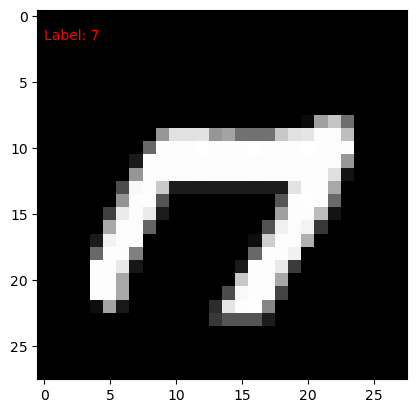

In [36]:
el_indice = 45000
arreglo_imagen = np.array(x[el_indice])
fig, ax = plt.subplots()
ax.imshow(arreglo_imagen.reshape((28, 28)), cmap="gray")
ax.text(0, 2, "Label: " + str(y[el_indice]), ha="left", va="bottom", color='red')
plt.show()

In [37]:
# Seleccionar los indices de los números a predecir
indices_0_1 = [i for i, j in enumerate(y) if j == 0 or j == 1]

len(indices_0_1)

14780

In [38]:
# Extraer los números y etiquetas
x_0_1 = x[indices_0_1]
y_0_1 = y[indices_0_1]

In [39]:
# Seleccionar aleatoriamente los indices de los números
indices_reordenados = np.random.permutation(len(indices_0_1))

x_0_1 = x_0_1[indices_reordenados]
y_0_1 = y_0_1[indices_reordenados]

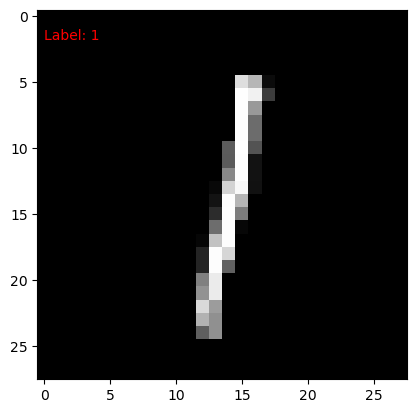

In [40]:
el_indice = 5000
arreglo_imagen = np.array(x_0_1[el_indice])
fig, ax = plt.subplots()
ax.imshow(arreglo_imagen.reshape((28, 28)), cmap="gray")
ax.text(0, 2, "Label: " + str(y_0_1[el_indice]), ha="left", va="bottom", color='red')
plt.show()

In [41]:
# Seleccinar aleatoriamente el conjunto de entrenamiento
index_for_train = np.random.choice(x_0_1.shape[0], int(x_0_1.shape[0] * 0.8), replace=False)

x_train = x_0_1[index_for_train]
y_train = y_0_1[index_for_train]

len(x_train)

11824

In [42]:
# Seleccionaremos el 20% restante para hacer las pruebas,
# mediante operaciones de conjuntos.
group_all_indexes_100p = set(range(x_0_1.shape[0])) 
group_selected_indexes_80p = set(index_for_train)
group_not_selected_indexes_20p = group_all_indexes_100p - group_selected_indexes_80p
group_not_selected_indexes_20p = list(group_not_selected_indexes_20p)

x_test = x_0_1[group_not_selected_indexes_20p]
y_test = y_0_1[group_not_selected_indexes_20p]

len(x_test)

2956

In [43]:
import sys
sys.path.append("../libs")
import neuronas
import importlib
importlib.reload(neuronas)

from neuronas import NeuronaPerceptron

In [45]:
neurona_mnist_sn = NeuronaPerceptron(entradas=784, salidas=1)

salida_sn = neurona_mnist_sn.predecir_feedforward(x_test)

In [64]:
neurona_mnist_0 = NeuronaPerceptron(entradas=784, salidas=1)

neurona_mnist_0.entrenar_ajustar(x_train, y_train, 0.025, 1)

salida_0 = neurona_mnist_0.predecir_feedforward(x_test)

In [58]:
neurona_mnist_1 = NeuronaPerceptron(entradas=784, salidas=1)

neurona_mnist_1.entrenar_ajustar(x_train, y_train, 0.025, 2)

salida_1 = neurona_mnist_1.predecir_feedforward(x_test)



In [47]:
from sklearn.metrics import classification_report, confusion_matrix 
print("Sin entrenar: ")
print(classification_report(y_test, salida_sn))
print(confusion_matrix(y_test, salida_sn))

Sin entrenar: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1348
           1       0.54      1.00      0.70      1608

    accuracy                           0.54      2956
   macro avg       0.27      0.50      0.35      2956
weighted avg       0.30      0.54      0.38      2956

[[   0 1348]
 [   0 1608]]


c:\Users\balde\anaconda3\envs\DL2025\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\balde\anaconda3\envs\DL2025\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\balde\anaconda3\envs\DL2025\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [65]:
print("1 época: ")
print(classification_report(y_test, salida_0))
print(confusion_matrix(y_test, salida_0))

1 época: 
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1385
           1       1.00      0.99      1.00      1571

    accuracy                           1.00      2956
   macro avg       1.00      1.00      1.00      2956
weighted avg       1.00      1.00      1.00      2956

[[1383    2]
 [  10 1561]]


In [ ]:
print("2 épocas: ")
print(classification_report(y_test, salida_1))
print(confusion_matrix(y_test, salida_1))

2 épocas: 
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1385
           1       1.00      1.00      1.00      1571

    accuracy                           1.00      2956
   macro avg       1.00      1.00      1.00      2956
weighted avg       1.00      1.00      1.00      2956

[[1384    1]
 [   7 1564]]
